## Waste Management using CNN Model 

In [1]:
# Importing necessary libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')


In [2]:
train_path = "Dataset/TRAIN"
test_path = "Dataset/TEST"

In [6]:
# Importing libraries from tensorflow 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.utils import plot_model
from glob import glob

In [9]:
# Visualization
from cv2 import cvtColor
x_data = []
y_data = []
for category in glob(train_path+'/*'):
    for file in tqdm(glob(category+'/*')):
        img_array = cv2.imread(file)
        img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        x_data.append(img_array)
        y_data.append(category.split('/')[-1])
data = pd.DataFrame({'image' : x_data, 'label' : y_data})


100%|██████████| 9999/9999 [00:58<00:00, 172.15it/s]


In [10]:
data.shape


(22564, 2)

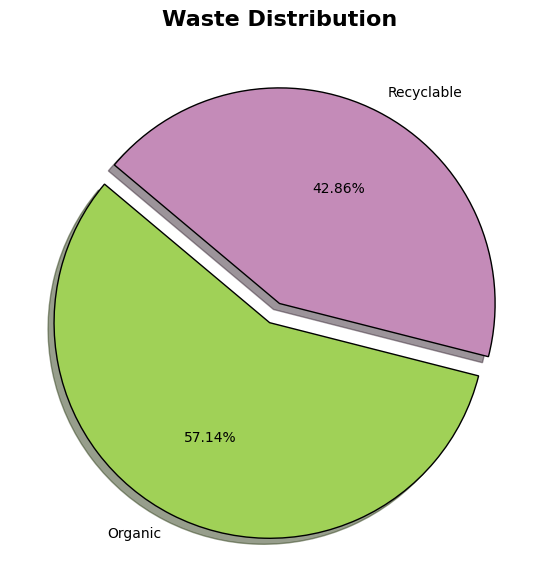

In [11]:
import matplotlib.pyplot as plt

# Sample data - Replace with your actual data
data = pd.DataFrame({
    'label': ['Organic', 'Recyclable', 'Organic', 'Recyclable', 'Organic', 'Organic', 'Recyclable']
})

# Define colors and labels
colors = ["#a0d157", "#c48bb8"]
labels = ['Organic', 'Recyclable']

# Create the pie chart
plt.figure(figsize=(7, 7))  # Make the pie chart a bit bigger
plt.pie(data['label'].value_counts(), 
        labels=labels, 
        autopct="%0.2f%%",  # Display percentage with 2 decimal places
        colors=colors, 
        startangle=140,  # Start angle to make the chart look more attractive
        explode=(0.1, 0),  # "explode" the first slice (Organic) for emphasis
        shadow=True,  # Add shadow to give a 3D effect
        wedgeprops={'edgecolor': 'black', 'linewidth': 1})  # Add black edges to the wedges

# Add a title
plt.title("Waste Distribution", fontsize=16, fontweight='bold')

# Display the pie chart
plt.show()


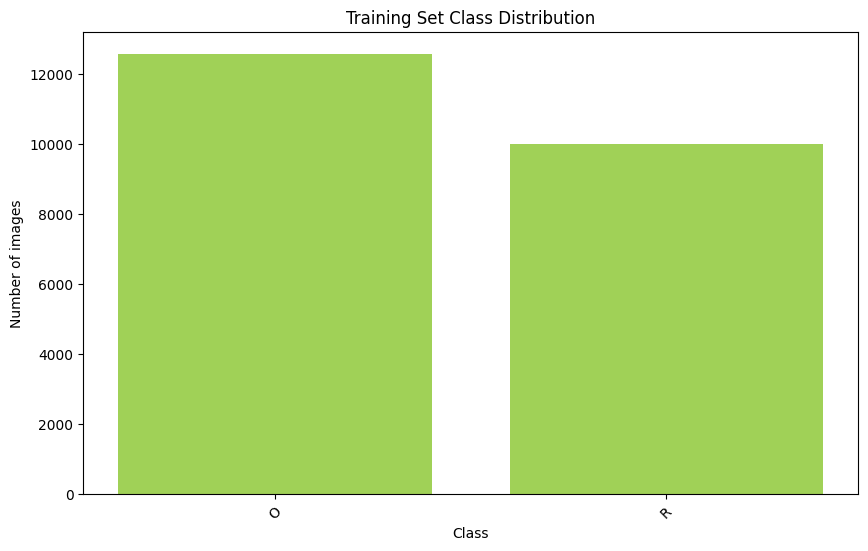

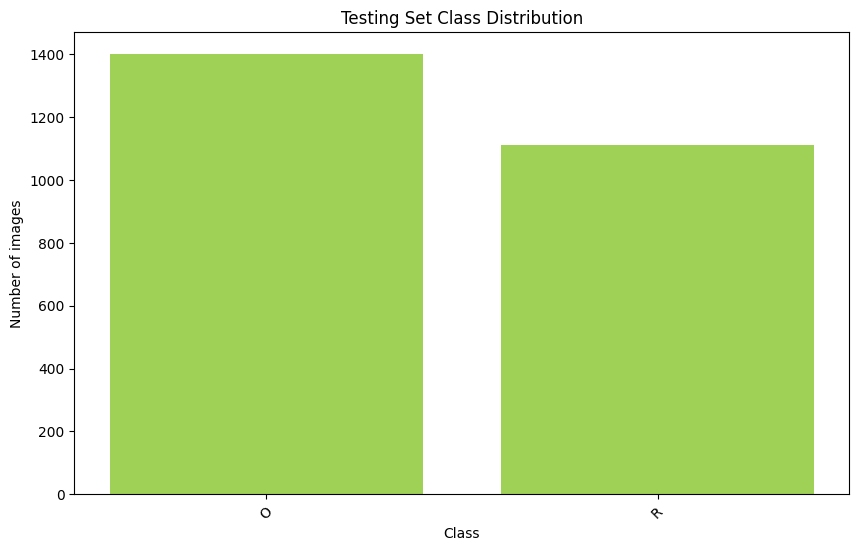

Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.
16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ efficientnetb0 (Functional)     │ (None, 7, 7, 1280)     │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 62720)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │    32,113,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 2)              │           514 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 36,296,613 (138.46 MB)

 Trainable params: 32,246,018 (123.01 MB)

 Non-trainable params: 4,050,595 (15.45 MB)

Epoch 1/20
706/706 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5236 - loss: 0.8282

706/706 ━━━━━━━━━━━━━━━━━━━━ 1653s 2s/step - accuracy: 0.5236 - loss: 0.8281 - val_accuracy: 0.4425 - val_loss: 1.5290
Epoch 2/20
136/706 ━━━━━━━━━━━━━━━━━━━━ 22:40 2s/step - accuracy: 0.5250 - loss: 0.7028

In [ ]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
import warnings
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.applications import ResNet50, EfficientNetB0
from sklearn.metrics import confusion_matrix, roc_curve, auc, classification_report
import seaborn as sns
from glob import glob
import os

# Suppress warnings
warnings.filterwarnings('ignore')

# Paths to your dataset (adjust paths if needed)
train_path = "Dataset/TRAIN"
test_path = "Dataset/TEST"

# Data Analysis
# Load all filenames from the training and testing directories
train_categories = os.listdir(train_path)
test_categories = os.listdir(test_path)

# Class distribution visualization
def plot_class_distribution(path, title="Class Distribution"):
    class_counts = [len(os.listdir(os.path.join(path, category))) for category in os.listdir(path)]
    plt.figure(figsize=(10, 6))
    plt.bar(os.listdir(path), class_counts, color="#a0d157")
    plt.title(title)
    plt.xlabel("Class")
    plt.ylabel("Number of images")
    plt.xticks(rotation=45)
    plt.show()

plot_class_distribution(train_path, "Training Set Class Distribution")
plot_class_distribution(test_path, "Testing Set Class Distribution")

# Data Augmentation
image_gen_train = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,   # More aggressive random rotations
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    fill_mode='nearest'
)

image_gen_val = ImageDataGenerator(rescale=1./255)  # Only rescaling for validation data

# Flow from directory (This loads data in batches directly from disk)
train_generator = image_gen_train.flow_from_directory(
    train_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse',
    shuffle=True
)

validation_generator = image_gen_val.flow_from_directory(
    test_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse',
    shuffle=False
)

# Model Architecture: EfficientNetB0 + Custom Dense Layers
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Freeze the convolutional base layers

# Constructing the model
model = Sequential([
    base_model,
    Flatten(),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')  # Output layer for binary classification (adjust if more classes)
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Model Summary
model.summary()

# Callbacks for better training performance
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss', mode='min')

# Train the model
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=validation_generator,
    callbacks=[early_stopping, model_checkpoint]
)

# Visualize the training history
plt.figure(figsize=(12, 6))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Confusion Matrix
y_pred = model.predict(validation_generator)
y_pred_classes = np.argmax(y_pred, axis=1)

# True Labels
true_labels = validation_generator.classes

conf_matrix = confusion_matrix(true_labels, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=validation_generator.class_indices.keys(), 
            yticklabels=validation_generator.class_indices.keys())
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Classification Report (precision, recall, f1-score)
print(classification_report(true_labels, y_pred_classes))

# ROC Curve and AUC (only works if there are more than 2 classes, binary example here)
fpr, tpr, thresholds = roc_curve(true_labels, y_pred[:,1])
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f"ROC curve (area = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()
